In [406]:
library(data.table)
library(ggplot2)
library(latex2exp)


In [407]:
time <- as.integer(200)

In [409]:
N_AGENTS <- 1134

In [3]:
N_AGENTS <- 12625

In [410]:
mypath <- "../../log/URV-contact-active"

In [411]:
#mypath <- "/home/nik/ProvaEmailcontacts2.5/ProvaEmailcontacts2.5"

In [412]:
list.dirs <- function(path=".", pattern=NULL, all.dirs=FALSE,
  full.names=FALSE, ignore.case=FALSE) {
  # use full.names=TRUE to pass to file.info
  all <- list.files(path, pattern, all.dirs,
           full.names=TRUE, recursive=FALSE, ignore.case)
  dirs <- all[file.info(all)$isdir]
  # determine whether to return full names or just dir names
  if(isTRUE(full.names))
    return(dirs)
  else
    return(basename(dirs))
}

In [413]:
thepath = list.dirs(mypath)[1]

In [414]:
filename = paste(mypath, '/', thepath, '/', 'k_core.csv', sep = "")

In [415]:
DF <- read.csv(file = filename, skip=12)

In [416]:
tempDF <- DF[DF$state =='i',]
tempDF <- tempDF[tempDF$time == 1,]

In [417]:
tempDF

,time,agent,k.core,state,degree
1034,1,1033,1,i,1


In [418]:
agent <- as.integer(tempDF['agent'])
kcore <- as.integer(tempDF['k.core'])

In [419]:
DF$'agent.init' <- agent
DF$'k.core.init' <- kcore
DF$'density' <- 1

In [420]:
DT <- data.table(DF)

In [421]:
DT1 = DT[, sum(density), by=list(time, state)]

In [422]:
names(DT1)[names(DT1)=="V1"] <- "density"

In [423]:
DT1$density <- DT1$density / N_AGENTS

In [424]:
DT1$'agent.init' <- agent
DT1$'k.core.init' <- kcore

In [425]:
tempDT1 <- DT1[DT1$state == 'r']
tempDT1 <- tempDT1[tempDT1$time == 200]
density <- as.numeric(tempDT1[,'density'])

In [426]:
DT1 = DT1[DT1$state == 'r']
DT1[,state:=NULL]

## All datasets

Assemble everything and do the loops

In [427]:
emptytable <- data.table()
lista = list.dirs(mypath)
for (i in lista){    
    filename = paste(mypath, '/', i, '/', 'k_core.csv', sep = "")
    print(filename)
    DF <- read.csv(file = filename, skip=12)
    tempDF <- DF[DF$state =='i',]
    tempDF <- tempDF[tempDF$time == 1,]

    agent <- as.integer(tempDF['agent'])
    kcore <- as.integer(tempDF['k.core'])

    DF$'agent.init' <- agent
    DF$'k.core.init' <- kcore
    DF$'density' <- 1
    DF$'density.mean' <- 1
    DF$'density.std' <- 1

    DT <- data.table(DF)
    DT1 = DT[, sum(density), by=list(time, state)]
    
    names(DT1)[names(DT1)=="V1"] <- "density"

    DT1$density <- DT1$density / N_AGENTS

    DT1$'agent.init' <- agent
    DT1$'k.core.init' <- kcore
    
    tempDT1 <- DT1[DT1$state == 'r']
    tempDT1 <- tempDT1[tempDT1$time == 200]
    density <- as.numeric(tempDT1[,'density'])
    
    DT1 = DT1[DT1$state == 'r']
    DT1[,state:=NULL]
    #print(DT1)
    emptytable <- rbind(emptytable, DT1)
}

[1] "../../log/URV-contact-active/2019_06_03_18_54_07/k_core.csv"
[1] "../../log/URV-contact-active/2019_06_03_18_54_12/k_core.csv"
[1] "../../log/URV-contact-active/2019_06_03_18_54_14/k_core.csv"
[1] "../../log/URV-contact-active/2019_06_03_18_54_21/k_core.csv"
[1] "../../log/URV-contact-active/2019_06_03_18_54_52/k_core.csv"
[1] "../../log/URV-contact-active/2019_06_03_18_54_58/k_core.csv"
[1] "../../log/URV-contact-active/2019_06_03_18_55_01/k_core.csv"
[1] "../../log/URV-contact-active/2019_06_03_18_55_07/k_core.csv"
[1] "../../log/URV-contact-active/2019_06_03_18_55_43/k_core.csv"
[1] "../../log/URV-contact-active/2019_06_03_18_55_49/k_core.csv"
[1] "../../log/URV-contact-active/2019_06_03_18_55_53/k_core.csv"
[1] "../../log/URV-contact-active/2019_06_03_18_55_58/k_core.csv"
[1] "../../log/URV-contact-active/2019_06_03_18_56_44/k_core.csv"
[1] "../../log/URV-contact-active/2019_06_03_18_56_45/k_core.csv"
[1] "../../log/URV-contact-active/2019_06_03_18_56_53/k_core.csv"
[1] "../..

In [428]:
rawtable <- emptytable

Compute mean and standard deviation and add to data table

In [488]:
emptytable <- rawtable

In [489]:
emptytabletime <- emptytable[emptytable$time == 200]
emptytabletime$density <- emptytabletime$density + 1e-3
#emptytabletime <- emptytabletime[emptytabletime$density < 0.21]
#emptytabletime <- emptytabletime[emptytabletime$density > 0.05]
#emptytabletime$k.core.init <- emptytabletime$k.core.init + emptytabletime$k.core.init %% 2
toplot <- emptytabletime[, mean(density), by=list(time, k.core.init)][,'k.core.init']
toplot$mean <- emptytabletime[emptytabletime$time == 200][, mean(density), by=list(time, k.core.init)][,'V1']
toplot$std <- emptytabletime[emptytabletime$time == 200][, sd(density), by=list(time, k.core.init)][,'V1']

Clean NaN values

In [490]:
toplot[is.na(toplot)] <- 1e-4

In [491]:
toplot = toplot[order(toplot$k.core.init),]

In [492]:
toplot

k.core.init,mean,std
1,0.0460569617236,0.0789717986364
2,0.1034357691024,0.0925949541326
3,0.0785119494926,0.0915521535442
4,0.1219523809524,0.0870678809188
5,0.1132011561826,0.0900303998051
6,0.1414585537919,0.0751596952735
7,0.1580245057087,0.0634965272986
8,0.1756619635509,0.0412643544799
9,0.1759860763019,0.0359973714881
10,0.1802983459650,0.0209231194383


Plot

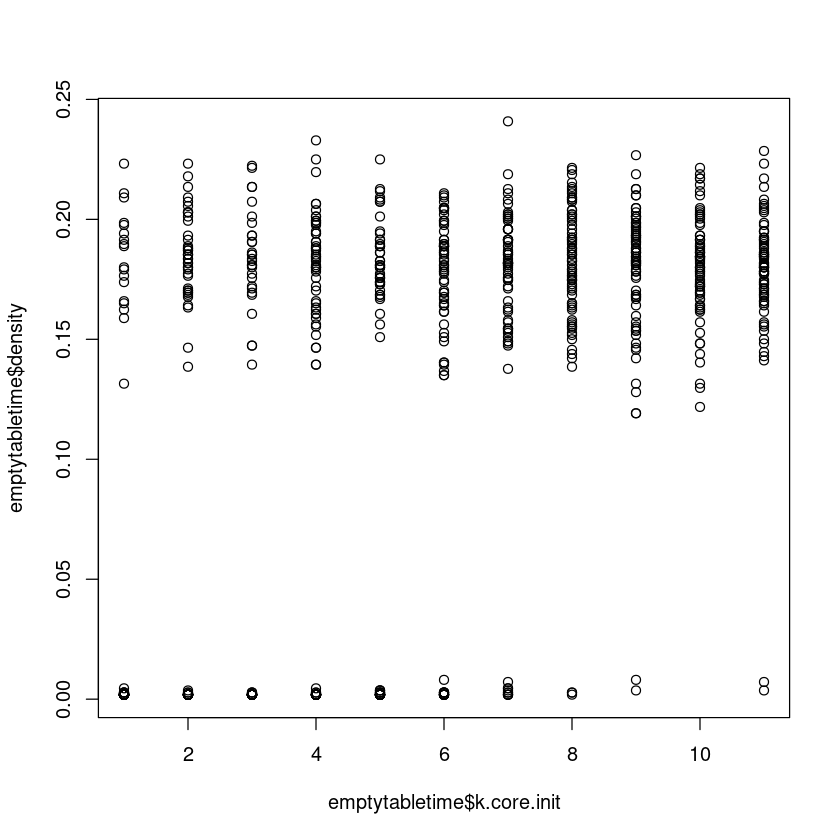

In [493]:
plot(emptytabletime$k.core.init, emptytabletime$density)

In [494]:
f <- function(x,a,b) {a * exp(b * x)} 



Call:
lm(formula = y ~ x)

Residuals:
           Min             1Q         Median             3Q            Max 
-0.02384870711 -0.01234540934  0.00395695855  0.01263833448  0.02076466915 

Coefficients:
                 Estimate    Std. Error t value   Pr(>|t|)
(Intercept) 0.05714023772 0.01072970508 5.32542 0.00047756
x           0.01276543112 0.00158200871 8.06913 2.0663e-05

Residual standard error: 0.0165922473 on 9 degrees of freedom
Multiple R-squared:  0.87856026,	Adjusted R-squared:  0.865066955 
F-statistic: 65.1108304 on 1 and 9 DF,  p-value: 2.06630369e-05


[1] 0.937315453683


Call:
lm(formula = y ~ poly(x, 2))

Residuals:
           Min             1Q         Median             3Q            Max 
-0.01792159834 -0.00751238919  0.00148589769  0.00536412998  0.02674676975 

Coefficients:
                  Estimate     Std. Error  t value   Pr(>|t|)
(Intercept)  0.13373282441  0.00429698047 31.12251 1.2353e-09
poly(x, 2)1  0.13388497104  0.01425147196  9.39447 1.3505e-05
poly(x, 2)2 -0.02920425323  0.01425147196 -2.04921     0.0746

Residual standard error: 0.014251472 on 8 degrees of freedom
Multiple R-squared:  0.920362553,	Adjusted R-squared:  0.900453191 
F-statistic: 46.2276272 on 2 and 8 DF,  p-value: 4.02225237e-05


[1] 0.95935527986

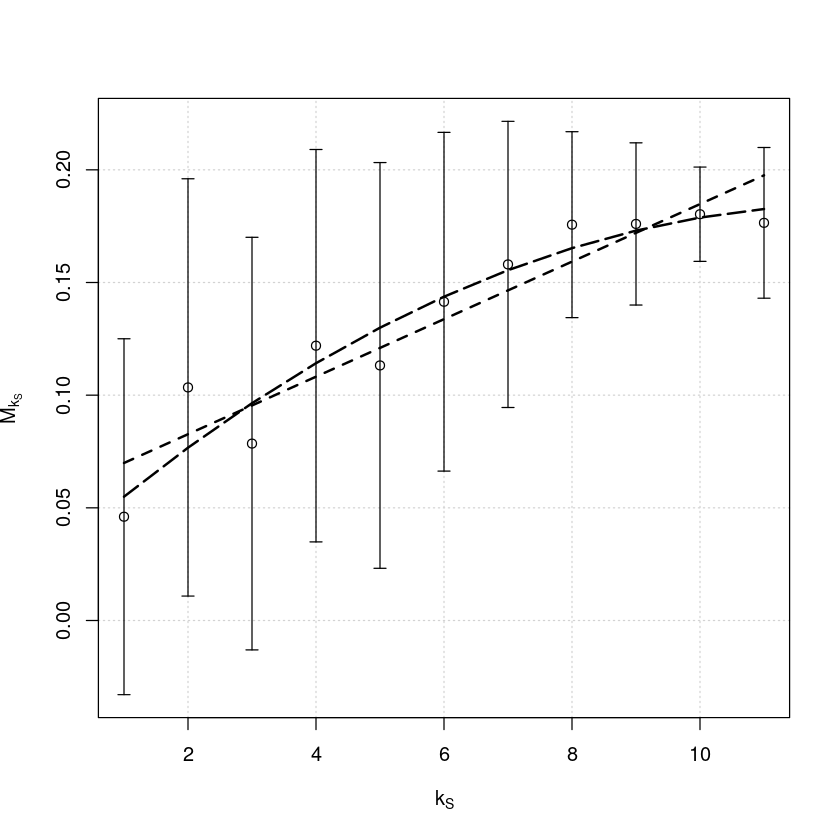

In [495]:
x <- toplot$k.core.init
y <- toplot$mean
dy <- toplot$std
plot(x, y,
    ylim=range(c(y-dy, y+dy)),
     #log='y',
     xlab=TeX('$k_S$'), ylab=TeX('$M_{k_S}$'),
    #main="Scatter plot with std.dev error bars"
     panel.first=grid()
)
arrows(x, y-dy, x, y+dy, length=0.05, angle=90, code=3)


#nonlin_mod=nls(y~a*exp(b*x),start=list(a=1,b=0.1)) #a is the starting value and b is the exponential start
#lines(x,predict(nonlin_mod),col="red")
#summary(nonlin_mod)

# constant
m<-lm(y~x)
summary(m)
cor(y,predict(m))
lines(x,predict(m),lty=2,col="black",lwd=2)

# polynomial
m<-lm(y ~ poly(x,2))
summary(m)
cor(y,predict(m))
#plot
lines(x,predict(m),lty=5,col="black",lwd=2)



Formula: y ~ a * x/(b + x)

Parameters:
      Estimate   Std. Error t value   Pr(>|t|)
a 0.2660418269 0.0334292644 7.95835 2.3077e-05
b 5.0055434829 1.4603527267 3.42763  0.0075365

Residual standard error: 0.0143445661 on 9 degrees of freedom

Number of iterations to convergence: 8 
Achieved convergence tolerance: 1.37792355e-06


[1] 0.954192787714


Formula: y ~ 1 - exp(-(1 + b) * x)

Parameters:
        Estimate     Std. Error    t value   Pr(>|t|)
b -0.97758378474  0.00156238283 -625.70054 < 2.22e-16

Residual standard error: 0.0290504942 on 10 degrees of freedom

Number of iterations to convergence: 6 
Achieved convergence tolerance: 6.33015763e-06


[1] 0.94321455642

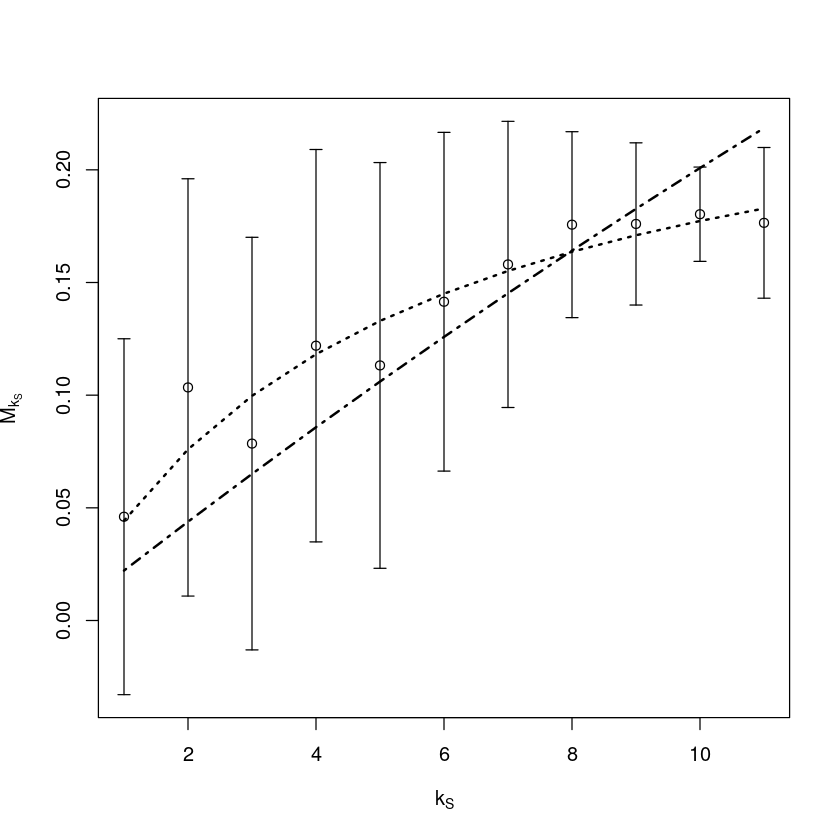

In [496]:
plot(x, y,
    ylim=range(c(y-dy, y+dy)),
     #log='y',
     xlab=TeX('$k_S$'), ylab=TeX('$M_{k_S}$'),
    #main="Scatter plot with std.dev error bars"
)
arrows(x, y-dy, x, y+dy, length=0.05, angle=90, code=3)

# hyperbolic
m<-nls(y~a*x/(b+x), start=c(a=1,b=1))
summary(m)
cor(y,predict(m))
#plot
lines(x,predict(m),lty=3,col="black",lwd=2)

# exponential
m<-nls(y~1 - exp(-(1+b)*x), start=list(b=0.1))
summary(m)
cor(y,predict(m))
#plot
lines(x,predict(m),lty=4,col="black",lwd=2)

In [462]:
pdf('mksonks.pdf')
plot(toplot$k.core.init, toplot$mean,
    ylim=range(c(toplot$mean-toplot$std, toplot$mean+toplot$std)),
     #log='y',
     xlab=TeX('$k_S$'), ylab=TeX('$M_{k_S}$'),
    #main="Scatter plot with std.dev error bars"
)
arrows(toplot$k.core.init, toplot$mean-toplot$std, 
       toplot$k.core.init, toplot$mean+toplot$std, length=0.05, angle=90, code=3)
dev.off()


png 
  2

Log y plot

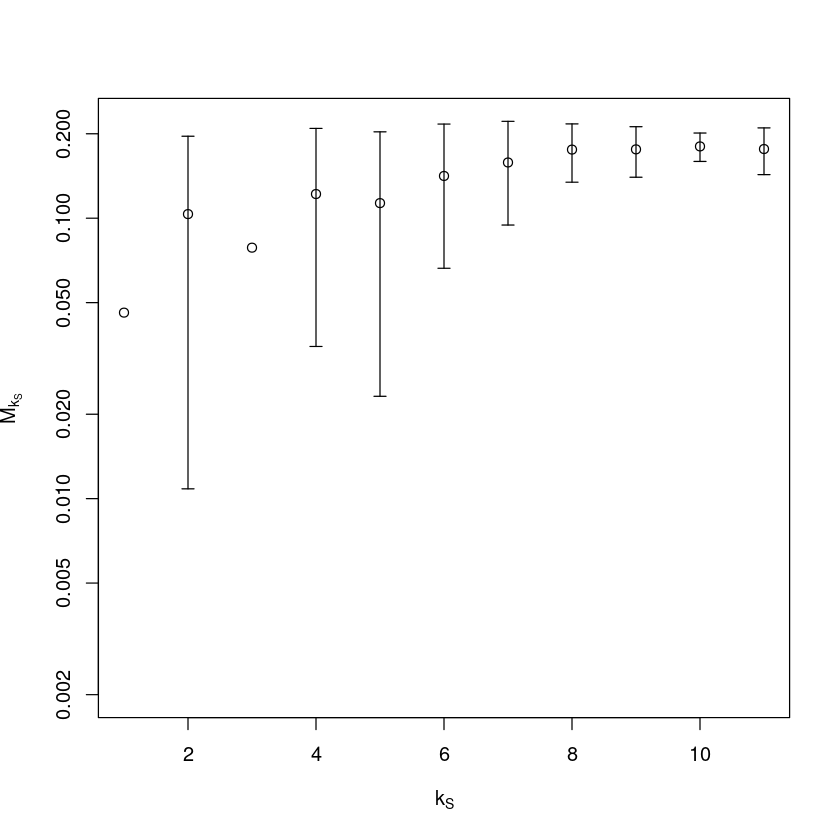

In [463]:
plot(x, y,
    ylim=range(c(2e-3, y+dy)),
     log='y',
     xlab=TeX('$k_S$'), ylab=TeX('$M_{k_S}$'),
    #main="Scatter plot with std.dev error bars"
)
arrows(x, y-dy, x, y+dy, length=0.05, angle=90, code=3)


In [452]:
pdf('logmksonks.pdf')
plot(toplot$k.core.init, toplot$mean,
     ylim=range(c(toplot$mean-toplot$std, toplot$mean+toplot$std)),
     log='y',
     xlab=TeX('$k_S$'), ylab=TeX('$M_{k_S}$'),
    #main="Scatter plot with std.dev error bars"
)
arrows(toplot$k.core.init, toplot$mean-toplot$std, 
       toplot$k.core.init, toplot$mean+toplot$std, length=0.05, angle=90, code=3)
dev.off()

png 
  2